In [1]:
#launch packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn import preprocessing
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Dataset overview

In [2]:
#Read both datasets provided by Paychex
df_1 = pd.read_csv('./PAYX_UR_2018Fall_1of2.csv')
df_2 = pd.read_csv('./PAYX_UR_2018Fall_2of2.csv')

In [3]:
#combine two datasets
df = pd.concat([df_1, df_2], ignore_index=True)
df.to_csv('./payx.csv')

In [4]:
#general info about dataset
print(df.columns)
print(df.dtypes)
print(df.shape)

Index(['Pseudo_ClientID', 'Date', 'Start', 'End', 'Duration', 'Activity', 'host_payx', 'orig_source', 'ACTV_JOB_COUNT', 'ACTV_WRKR_COUNT', 'WRKR_COUNT', 'BANK_COUNT', 'CHECK_COUNT', 'CLT_PAYCOMP_COUNT', 'CLT_TAX_COUNT', 'GL_ACCT_COUNT', 'JOB_COUNT', 'LOCATION_COUNT', 'ORG_UNIT_COUNT', 'PAYRUN_COUNT', 'PAY_PERIOD_COUNT', 'POSITION_COUNT', 'WRKR_PAY_COMP_AVG', 'WRKR_TAX_AVG', 'Issue_YN'], dtype='object')
Pseudo_ClientID       object
Date                  object
Start                 object
End                   object
Duration               int64
Activity              object
host_payx             object
orig_source           object
ACTV_JOB_COUNT       float64
ACTV_WRKR_COUNT      float64
WRKR_COUNT           float64
BANK_COUNT           float64
CHECK_COUNT          float64
CLT_PAYCOMP_COUNT    float64
CLT_TAX_COUNT        float64
GL_ACCT_COUNT        float64
JOB_COUNT            float64
LOCATION_COUNT       float64
ORG_UNIT_COUNT       float64
PAYRUN_COUNT         float64
PAY_PERIOD_COU

In [5]:
#how many clients are here?
num_clients = len(df.groupby('Pseudo_ClientID'))
num_clients

37515

In [6]:
#Is Issue_YN corresponding to individual client?
client_issue = df[['Pseudo_ClientID','Issue_YN']].drop_duplicates()
len(client_issue) == num_clients


True

In [7]:
#how many 0s and 1s?
print(client_issue.groupby('Issue_YN').count())

          Pseudo_ClientID
Issue_YN                 
0                   35441
1                    2074


# Analysis on Profile

In [7]:
## miss_data will generate a missing value tabel for the dataset
## Features would be rows of the table, total # of missing values and percentage of values missed will be columns
## Descending order on top 20 features with highest total # of missing values
def miss_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(20)

## fill_value is used for filling null values
## df -- DataFrame, dataset
## df_id -- string, the primary key of dataset, which is "Pseudo_ClientID" in this case
## cal -- string, one of columns of dataset
## "pad" method is used for fillna thus all values filled will be the last valid value through transactions
def fill_value(df,df_id,cal):
        df[cal] = df.groupby(df_id)[cal].transform(lambda x: x.fillna(method='pad'))

##corr_mat will generate correlation matrix, includes all features
def corr_mat(df):
    corrmat = df.corr()
    f, ax = plt.subplots(figsize=(12, 9))
    return sns.heatmap(corrmat, vmax=.8, square=True)

## sort_corr_mat generates class label's correlation matrix, the correlation coefficient values are in descending order
## with high to low from top to bottom
## k -- int, number of features in class label's correlation matrix
## df -- DataFrame, dataset
def sort_corr_mat(k,df):
    cols = df.corr().abs().nlargest(k, 'Issue_YN')['Issue_YN'].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values).set_title('Issue_YN correlation matrix,  correlation values are in descending order from top left to bottom right')
    return plt.show()




In [9]:
#missing value tabel for the dataset df
miss_data(df)

,Total,Percent
ACTV_JOB_COUNT,2195152,0.914678
JOB_COUNT,2031463,0.846472
POSITION_COUNT,1555642,0.648207
GL_ACCT_COUNT,1508295,0.628478
WRKR_PAY_COMP_AVG,179969,0.074990
PAYRUN_COUNT,52012,0.021672
CHECK_COUNT,44834,0.018681
ACTV_WRKR_COUNT,30000,0.012500
BANK_COUNT,29796,0.012415
WRKR_TAX_AVG,29741,0.012393


In [10]:
#get features nma of all missing-value features
miss_data_df = miss_data(df)[miss_data(df)['Total']>0]
miss_value_features = miss_data_df.index.tolist()

In [11]:
## assuming profile-related features are cumulative through transactions
## fill the missing value with "pad" function
for item in miss_value_features:
    fill_value(df,'Pseudo_ClientID',item)

miss_data(df)

,Total,Percent
ACTV_JOB_COUNT,2194452,0.914387
JOB_COUNT,2030352,0.846009
POSITION_COUNT,1552760,0.647006
GL_ACCT_COUNT,1502213,0.625944
WRKR_PAY_COMP_AVG,175337,0.073060
PAYRUN_COUNT,34181,0.014243
CHECK_COUNT,30649,0.012771
ACTV_WRKR_COUNT,27422,0.011426
BANK_COUNT,27312,0.011380
WRKR_TAX_AVG,27307,0.011378


In [12]:
## Generating new DataFrame called df_profile
## the dataframe contains the latest transaction of each clients
## thus 1 client only has 1 record
df_profile = df.groupby('Pseudo_ClientID').tail(1)
df_profile = df_profile.drop(columns=['Date', 'Start','End','Duration','Activity','host_payx','orig_source'])\
.reset_index(drop=True)

In [13]:
## Add new feature NULL_COUNT, indicates how many features the client haven't filled value in
df_profile['NULL_COUNT'] = df_profile.isnull().sum(axis=1).tolist()
# get a list of the columns
col_list = list(df_profile)
# use this handy way to swap the elements
col_list[-1], col_list[-2] = col_list[-2], col_list[-1]
# assign back, the order will now be swapped
df_profile = df_profile.ix[:,col_list]
print('DataFrame df_profile contains', df_profile.shape[0], 'records with', df_profile.shape[1],'features')

DataFrame df_profile contains 37515 records with 19 features


In [14]:
#Missing value table for the new dataset (1 client 1 record)
miss_profile = miss_data(df_profile)
miss_profile

,Total,Percent
ACTV_JOB_COUNT,36535,0.973877
JOB_COUNT,35554,0.947728
POSITION_COUNT,32819,0.874823
GL_ACCT_COUNT,30499,0.812981
WRKR_PAY_COMP_AVG,7853,0.209330
PAYRUN_COUNT,1250,0.033320
CHECK_COUNT,1250,0.033320
ACTV_WRKR_COUNT,1113,0.029668
WRKR_TAX_AVG,1096,0.029215
PAY_PERIOD_COUNT,1096,0.029215


### Missed vs. not-missed

In [15]:
# number of clients with value missed, collected from the missing value table
total_null = miss_profile[miss_profile['Total']!=0]['Total'].tolist()
# number of clients with value filled
total_notnull = [len(df_profile)-x for x in total_null]
miss_col = miss_profile[miss_profile['Total']!=0].index.tolist()

In [16]:
perc_notnull=[]
perc_null=[]
for i in range(len(miss_col)):
    item = miss_col[i]
    #persentage of number of ISSUE clients who FILLED the value of specific feature
    not_null = df_profile[df_profile[item].notnull()]['Issue_YN'].value_counts()[1]/total_notnull[i]
    perc_notnull.append(not_null)
    #persentage of number of ISSUE clients who MISSED the value of specific feature
    is_null = df_profile[df_profile[item].isna()]['Issue_YN'].value_counts()[1]/total_null[i]
    perc_null.append(is_null)
    
df_miss_vs_issue=pd.DataFrame()
df_miss_vs_issue['FEATURES']=miss_col
df_miss_vs_issue['CLIENTS_MISSED_COUNT']= total_null
df_miss_vs_issue['ISSUE_CLIENTS_MISSED_PERCENTAGE']=perc_null
df_miss_vs_issue['CLIENTS_FILLED_COUNT']= total_notnull
df_miss_vs_issue['ISSUE_CLIENTS_FILLED_PERCENTAGE']= perc_notnull
df_miss_vs_issue['ISSUE_RATIO_FILLED_VS_MISSED'] = df_miss_vs_issue['ISSUE_CLIENTS_FILLED_PERCENTAGE']/df_miss_vs_issue['ISSUE_CLIENTS_MISSED_PERCENTAGE']

df_miss_vs_issue.to_csv('./df_miss_vs_issue.csv')
df_miss_vs_issue

,FEATURES,CLIENTS_MISSED_COUNT,ISSUE_CLIENTS_MISSED_PERCENTAGE,CLIENTS_FILLED_COUNT,ISSUE_CLIENTS_FILLED_PERCENTAGE,ISSUE_RATIO_FILLED_VS_MISSED
0,ACTV_JOB_COUNT,36535,0.050198,980,0.244898,4.878597
1,JOB_COUNT,35554,0.045790,1961,0.227435,4.966968
2,POSITION_COUNT,32819,0.022304,4696,0.285775,12.812642
3,GL_ACCT_COUNT,30499,0.030362,7016,0.163626,5.389233
4,WRKR_PAY_COMP_AVG,7853,0.003693,29662,0.068943,18.669405
5,PAYRUN_COUNT,1250,0.016800,36265,0.056611,3.369706
6,CHECK_COUNT,1250,0.010400,36265,0.056832,5.464582
7,ACTV_WRKR_COUNT,1113,0.008086,36402,0.056728,7.015320
8,WRKR_TAX_AVG,1096,0.007299,36419,0.056729,7.771822
9,PAY_PERIOD_COUNT,1096,0.007299,36419,0.056729,7.771822


In [17]:
df_profile.to_csv('./profile_after_add_null_count.csv')
df_profile.head(5)

,Pseudo_ClientID,ACTV_JOB_COUNT,ACTV_WRKR_COUNT,WRKR_COUNT,BANK_COUNT,CHECK_COUNT,CLT_PAYCOMP_COUNT,CLT_TAX_COUNT,GL_ACCT_COUNT,JOB_COUNT,LOCATION_COUNT,ORG_UNIT_COUNT,PAYRUN_COUNT,PAY_PERIOD_COUNT,POSITION_COUNT,WRKR_PAY_COMP_AVG,WRKR_TAX_AVG,NULL_COUNT,Issue_YN
0,00022C46-9142-4469-AEF6-E235802CBE11,NaN,-5.062429,-4.657624,-0.796265,-4.783789,-4.748977,0.511194,NaN,NaN,-1.282486,-2.503428,9.752293,8.621629,NaN,2.103113,-3.171023,4,0
1,00029786-E7BB-4442-90B1-C48A8211F0DF,NaN,-4.910984,-4.683246,-0.796265,-4.712576,-8.855622,-5.042807,NaN,NaN,-1.757961,-2.590043,-4.732344,-5.018195,NaN,-9.702801,-11.337071,4,0
2,0002A30C-B22C-447C-ADAF-025BA827B2F3,NaN,-3.123944,-2.979369,-0.796265,-2.132149,-9.540063,-3.288912,NaN,NaN,-1.757961,-2.027047,32.030294,31.625009,NaN,-9.702801,9.078048,4,0
3,00042184-FF8D-4255-8201-FB782CFEA259,NaN,-4.668674,-3.991447,-0.796265,-3.814034,-9.540063,-3.873543,NaN,NaN,-1.757961,-2.416813,13.688335,12.602983,NaN,NaN,4.995024,5,0
4,000477F9-3A91-479E-B10A-2C2BFA344360,NaN,-3.063366,-3.017803,1.385662,-3.009745,2.095431,-0.365754,NaN,NaN,-0.807011,-2.243584,41.161913,40.177547,NaN,2.103113,0.912001,4,0


For making profile_related features more linearly explainable, we want to obtain correlation matrix to see what features are strongly correlated with the class label

### First method, drop missing values

In [18]:
## Drop features which missing value percentage is large than >15
drop_columns = miss_profile[miss_profile['Percent']>=0.15].index.tolist()
df_profile_1 = df_profile.drop(columns=drop_columns, axis=1).copy()
## Drop records contains missing values
df_profile_1 = df_profile_1.drop(df_profile_1.loc[df_profile_1['PAYRUN_COUNT'].isnull()].index)
df_profile_1 = df_profile_1.drop(df_profile_1.loc[df_profile_1['CHECK_COUNT'].isnull()].index)
df_profile_1 = df_profile_1.drop(df_profile_1.loc[df_profile_1['ACTV_WRKR_COUNT'].isnull()].index)

In [19]:
print('there are', df_profile.shape[0] - df_profile_1.shape[0],'records have been deleted')
print('there are', df_profile.shape[1] - df_profile_1.shape[1],'features have been deleted')


there are 1309 records have been deleted
there are 5 features have been deleted


In [20]:
df_profile.dropna().describe()

,ACTV_JOB_COUNT,ACTV_WRKR_COUNT,WRKR_COUNT,BANK_COUNT,CHECK_COUNT,CLT_PAYCOMP_COUNT,CLT_TAX_COUNT,GL_ACCT_COUNT,JOB_COUNT,LOCATION_COUNT,ORG_UNIT_COUNT,PAYRUN_COUNT,PAY_PERIOD_COUNT,POSITION_COUNT,WRKR_PAY_COMP_AVG,WRKR_TAX_AVG,NULL_COUNT,Issue_YN
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.0,240.000000
mean,-0.366465,0.779906,-0.174485,-0.559890,-0.245316,6.578518,2.582982,2.021523,1.133518,0.451016,2.978018,-4.034025,-3.818566,-0.566784,5.464519,0.571749,0.0,0.491667
std,5.223165,13.091195,7.243907,0.641877,6.055944,12.626163,13.119105,12.641994,8.867145,11.353848,15.623328,3.318671,3.595534,8.839932,11.670380,8.461107,0.0,0.500975
min,-2.755430,-5.153295,-4.939468,-0.796265,-4.857097,-10.566724,-5.042807,-3.493944,-2.391888,-1.757961,-2.590043,-8.117341,-8.335990,-5.737730,-9.702801,-35.835214,0.0,0.000000
25%,-2.647451,-3.737293,-3.876147,-0.796265,-3.598301,-1.668993,-3.873543,-3.092152,-2.238314,-1.757961,-2.156969,-6.483883,-6.511203,-4.887712,-1.832191,-3.171023,0.0,0.000000
50%,-2.306902,-2.321290,-2.627064,-0.796265,-2.171944,4.148753,-2.704280,-2.384914,-1.704994,-1.757961,-1.377437,-4.889786,-4.649551,-3.017671,2.103113,0.912001,0.0,0.000000
75%,-0.723211,0.571292,0.626957,-0.796265,0.892313,11.335382,1.241983,0.978830,0.157439,-0.807011,1.101908,-2.370719,-2.327095,0.573657,13.909027,4.995024,0.0,1.000000
max,37.246610,161.738107,66.072485,4.658553,50.770801,73.619494,76.513303,93.601512,73.099486,128.046722,140.843862,10.775664,12.086882,74.674024,76.873901,74.406429,0.0,1.000000


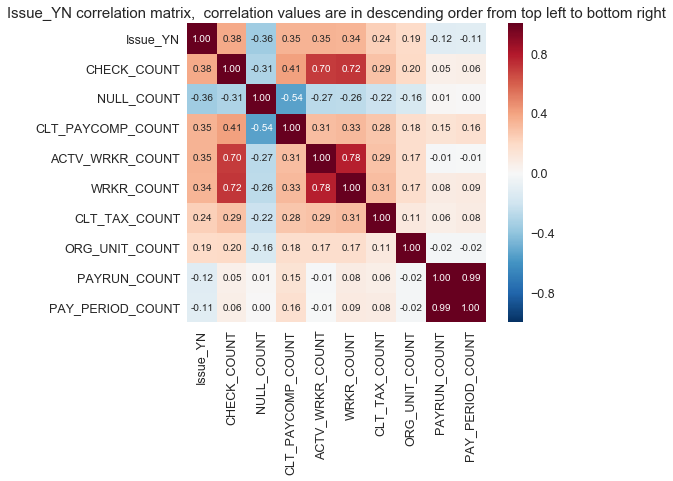

In [21]:
sort_corr_mat(10, df_profile_1)

### Second method, using LightGBM Regressor to predict missing values

----Original missing value table of profile-related dataset----
                   Total   Percent
ACTV_JOB_COUNT     36535  0.973877
JOB_COUNT          35554  0.947728
POSITION_COUNT     32819  0.874823
GL_ACCT_COUNT      30499  0.812981
WRKR_PAY_COMP_AVG   7853  0.209330
PAYRUN_COUNT        1250  0.033320
CHECK_COUNT         1250  0.033320
ACTV_WRKR_COUNT     1113  0.029668
WRKR_TAX_AVG        1096  0.029215
PAY_PERIOD_COUNT    1096  0.029215
ORG_UNIT_COUNT      1096  0.029215
LOCATION_COUNT      1096  0.029215
CLT_TAX_COUNT       1096  0.029215
CLT_PAYCOMP_COUNT   1096  0.029215
BANK_COUNT          1096  0.029215
WRKR_COUNT          1096  0.029215
Issue_YN               0  0.000000
NULL_COUNT             0  0.000000
Pseudo_ClientID        0  0.000000
----Solve missing value for features between WRKR_TAX_AVG to WRKR_COUNT on the tabel----

There are 1096 clients missed all features. The number of clients who missed all features is exactly equal to some features' number of total missi

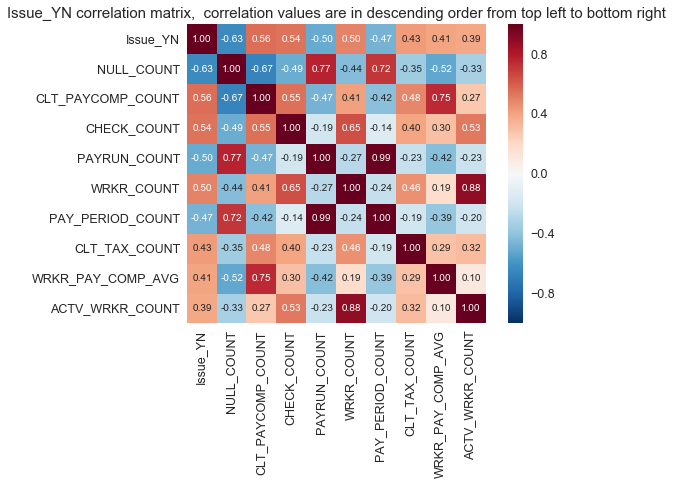

In [22]:
%run ./df_profile_missing_lgbm.ipynb
df_profile = pd.read_csv('./profile_clean_missed.csv',index_col=0)
df_profile.shape
sort_corr_mat(10,df_profile.dropna())

In [23]:
df_profile.to_csv('./profile_after_add_null_count.csv')
df_profile.drop(columns=['Issue_YN']).to_csv('./profile_without_YN.csv')

In [4]:
df = pd.read_csv('./profile_after_add_null_count.csv',index_col=0)

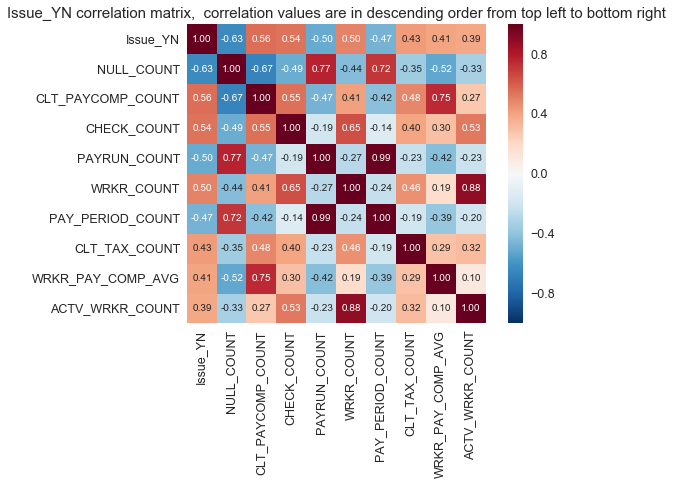

In [11]:
def sort_corr_mat(k,df):
    cols = df.corr().abs().nlargest(k, 'Issue_YN')['Issue_YN'].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values).set_title('Issue_YN correlation matrix,  correlation values are in descending order from top left to bottom right')
    return plt.show()

sort_corr_mat(10,df.dropna())

# pairs of columns productions

### Combining pair of features with Basic arithmetic (+, -, X, /) and obtain the new correlation matrix


In [24]:
df_profile.shape

(37515, 19)

In [25]:
import itertools as iter

In [26]:
%%time
#running time only take 2 secs.
matrix = df_profile.drop(columns=['Pseudo_ClientID', 'Issue_YN', 'NULL_COUNT'])

# Create DataFrame to fill with combinations
comparison_df_2 = pd.DataFrame(index=matrix.index)

for a, b in iter.combinations(matrix.columns, 2):
    # Subtract column combinations
    comparison_df_2['{}-{}'.format(a, b)] = matrix[a] - matrix[b]
    comparison_df_2['{}+{}'.format(a, b)] = matrix[a] + matrix[b]
    comparison_df_2['{}x{}'.format(a, b)] = matrix[a] * matrix[b]
print('combination done')
for a, b in iter.permutations(matrix.columns, 2):
    comparison_df_2['{}//{}'.format(a, b)] = matrix[a] / matrix[b]
print('permutations done')

combination done
permutations done
CPU times: user 976 ms, sys: 677 ms, total: 1.65 s
Wall time: 1.49 s


In [27]:
comparison_df_2['Issue_YN'] =df_profile['Issue_YN']

In [28]:
comparison_df_2.shape

(37515, 601)

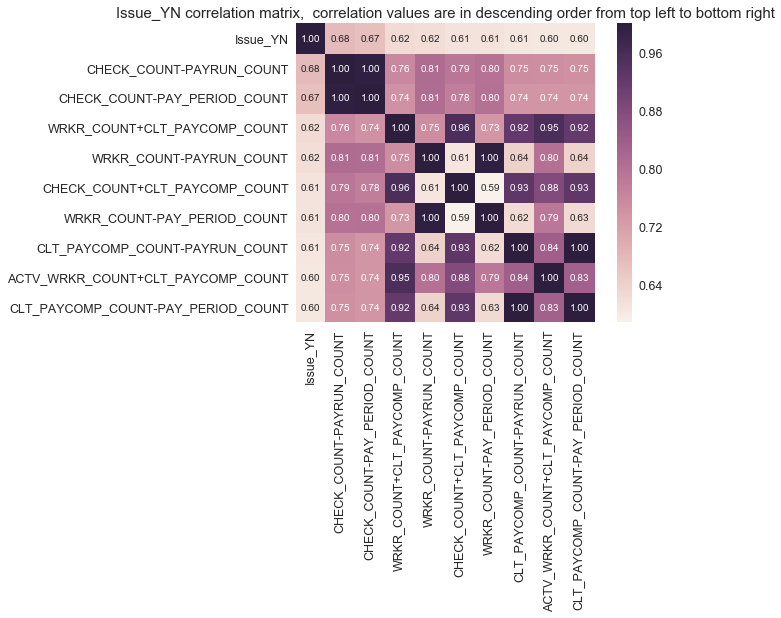

In [29]:
sort_corr_mat(10,comparison_df_2.dropna())

In [30]:
comparison_df_2.to_csv('./comparison_df_2.csv')

In [31]:
comparison_df_2=pd.read_csv('./comparison_df_2.csv',index_col=0)

# stats

In [59]:
df_profile_all = df.drop(columns=['Date','Start','End','Duration','Activity','host_payx','orig_source'])

df_profile_all['NULL_COUNT'] = df_profile_all.isnull().sum(axis=1).tolist()
# get a list of the columns
col_list = list(df_profile_all)
# use this handy way to swap the elements
col_list[-1], col_list[-2] = col_list[-2], col_list[-1]
# assign back, the order will now be swapped
df_profile_all = df_profile_all.ix[:,col_list]

df_profile_all.to_csv('./df_profile_all_with_null_count.csv')

----Original missing value table of profile-related dataset----
                     Total   Percent
ACTV_JOB_COUNT     2194452  0.914387
JOB_COUNT          2030352  0.846009
POSITION_COUNT     1552760  0.647006
GL_ACCT_COUNT      1502213  0.625944
WRKR_PAY_COMP_AVG   175337  0.073060
PAYRUN_COUNT         34181  0.014243
CHECK_COUNT          30649  0.012771
ACTV_WRKR_COUNT      27422  0.011426
BANK_COUNT           27312  0.011380
WRKR_TAX_AVG         27307  0.011378
PAY_PERIOD_COUNT     27307  0.011378
ORG_UNIT_COUNT       27307  0.011378
LOCATION_COUNT       27307  0.011378
CLT_TAX_COUNT        27307  0.011378
CLT_PAYCOMP_COUNT    27307  0.011378
WRKR_COUNT           27307  0.011378
Issue_YN                 0  0.000000
NULL_COUNT               0  0.000000
Pseudo_ClientID          0  0.000000
----Solve missing value for features between WRKR_TAX_AVG to WRKR_COUNT on the tabel----

There are 27307 clients missed all features. The number of clients who missed all features is exactly equa

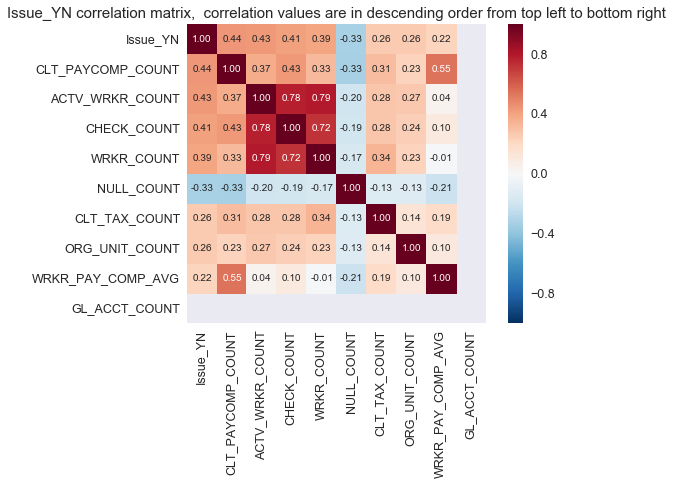

(2399917, 19)

In [60]:

#running time take 21 mins
%run ./df_profile_all_missing_lgbm.ipynb
df_profile_all = pd.read_csv('./profile_all_clean_missed.csv',index_col=0)
df_profile_all.shape

In [61]:
%%time
#running time take 2min 30s

matrix = df_profile_all.drop(columns=['Pseudo_ClientID', 'Issue_YN', 'NULL_COUNT'])

# Create DataFrame to fill with combinations
comparison_df_all_2 = pd.DataFrame(index=matrix.index)

for a, b in iter.combinations(matrix.columns, 2):
    # Subtract column combinations
    comparison_df_all_2['{}-{}'.format(a, b)] = matrix[a] - matrix[b]
    comparison_df_all_2['{}+{}'.format(a, b)] = matrix[a] + matrix[b]
    comparison_df_all_2['{}x{}'.format(a, b)] = matrix[a] * matrix[b]
print('combination done')
for a, b in iter.permutations(matrix.columns, 2):
    comparison_df_all_2['{}//{}'.format(a, b)] = matrix[a] / matrix[b]
print('permutations done')

combination done
permutations done
CPU times: user 50.9 s, sys: 1min 32s, total: 2min 23s
Wall time: 2min 22s


In [62]:
df_profile_all_2 = pd.merge(df_profile_all, comparison_df_all_2, left_index=True, right_index=True)

In [63]:
temp = df_profile_all_2.pop('Issue_YN') # remove column b and store it in df1
df_profile_all_2['Issue_YN']=temp

In [64]:
df_profile_all_2.columns[1:-1]

Index(['ACTV_JOB_COUNT', 'ACTV_WRKR_COUNT', 'WRKR_COUNT', 'BANK_COUNT', 'CHECK_COUNT', 'CLT_PAYCOMP_COUNT', 'CLT_TAX_COUNT', 'GL_ACCT_COUNT', 'JOB_COUNT', 'LOCATION_COUNT',
       ...
       'WRKR_TAX_AVG//CLT_PAYCOMP_COUNT', 'WRKR_TAX_AVG//CLT_TAX_COUNT', 'WRKR_TAX_AVG//GL_ACCT_COUNT', 'WRKR_TAX_AVG//JOB_COUNT', 'WRKR_TAX_AVG//LOCATION_COUNT', 'WRKR_TAX_AVG//ORG_UNIT_COUNT', 'WRKR_TAX_AVG//PAYRUN_COUNT', 'WRKR_TAX_AVG//PAY_PERIOD_COUNT', 'WRKR_TAX_AVG//POSITION_COUNT', 'WRKR_TAX_AVG//WRKR_PAY_COMP_AVG'], dtype='object', length=617)

In [65]:
df_profile_all_2.shape

(2399917, 619)

In [66]:
f={}
stat=['max','min','mean','std',pd.Series.nunique]
for col in list(df_profile_all_2.columns[1:-1]):
    f[col] = stat


In [67]:
%%time
#running time take
df_profile_all_stats= pd.DataFrame()
df_profile_all_stats = df_profile_all_2.groupby('Pseudo_ClientID').agg(f).reset_index()
print('done with aggregation')
df_profile_all_stats.columns = ['@'.join(x) for x in df_profile_all_stats.columns.ravel()]
print('done with naming columns')


done with aggregation
done with naming columns
CPU times: user 33min 45s, sys: 24.9 s, total: 34min 10s
Wall time: 34min 19s


In [85]:
df_profile = pd.read_csv('./profile_after_add_null_count.csv', index_col=0)

In [91]:
df_profile = df_profile.sort_index()

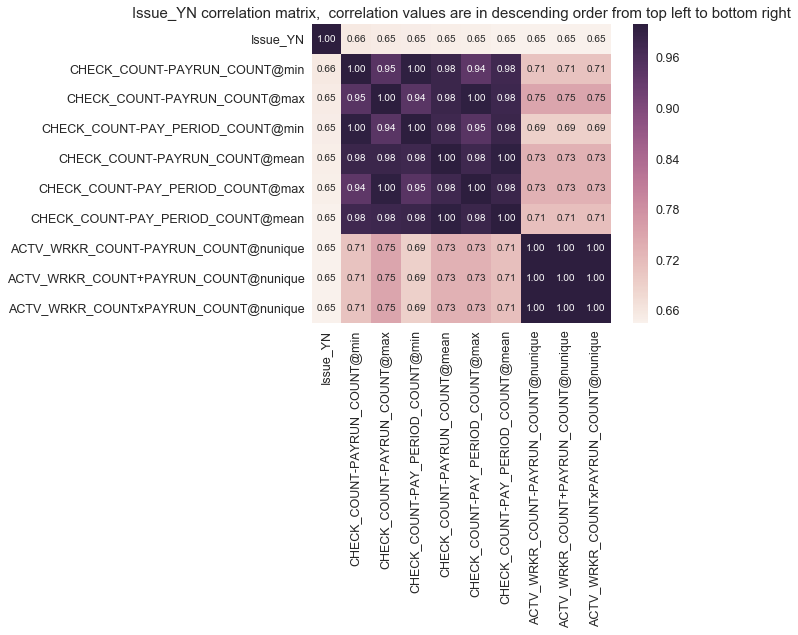

In [92]:
df_profile_all_stats['Issue_YN'] = df_profile['Issue_YN']
sort_corr_mat(10,df_profile_all_stats.dropna())

In [93]:
df_profile_all_stats.to_csv('./df_profile_all_stats.csv')

In [94]:
df_profile_all_stats=pd.read_csv('./df_profile_all_stats.csv',index_col=0)

In [95]:
df_profile_all_stats.shape

(37515, 3087)

# MERGE

In [109]:
df_profile_all_stats.drop('Pseudo_ClientID@', axis=1)

ACTV_JOB_COUNT@max                                    NaN
ACTV_JOB_COUNT@min                                    NaN
ACTV_JOB_COUNT@mean                                   NaN
ACTV_JOB_COUNT@std                                    NaN
ACTV_JOB_COUNT@nunique                           0.000000
ACTV_WRKR_COUNT@max                             -4.971562
ACTV_WRKR_COUNT@min                             -4.971562
ACTV_WRKR_COUNT@mean                            -4.971562
ACTV_WRKR_COUNT@std                              0.000000
ACTV_WRKR_COUNT@nunique                          1.000000
WRKR_COUNT@max                                  -4.836979
WRKR_COUNT@min                                  -4.836979
WRKR_COUNT@mean                                 -4.836979
WRKR_COUNT@std                                   0.000000
WRKR_COUNT@nunique                               1.000000
BANK_COUNT@max                                  -0.796265
BANK_COUNT@min                                  -0.796265
BANK_COUNT@mea

In [110]:
df_1 = df_profile.drop('Issue_YN',axis=1).copy()
df_2 = comparison_df_2.drop('Issue_YN',axis=1).copy()
df_3 = df_profile_all_stats.drop('Issue_YN',axis=1).copy()
df_3 = df_3.drop('Pseudo_ClientID@', axis=1)

In [111]:
df_profile_merge = pd.concat([df_1, df_2, df_3], axis=1)
df_profile_merge.shape

(37515, 3703)

In [112]:
df_profile_merge['Issue_YN'] = df_profile['Issue_YN']

In [113]:
df_profile_merge.to_csv('./df_profile_merge.csv')

# DISTRIBUTION PLOT 

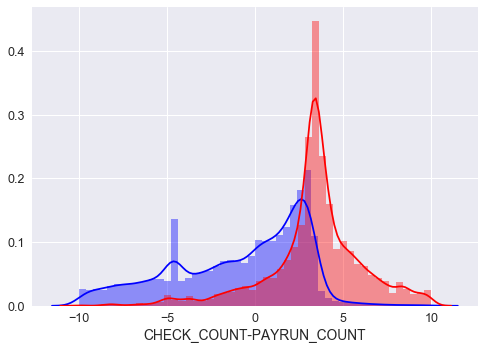

In [142]:
sns.distplot(comparison_df_2[(comparison_df_2['Issue_YN']==0) & (comparison_df_2['CHECK_COUNT-PAYRUN_COUNT'] < 10) & (comparison_df_2['CHECK_COUNT-PAYRUN_COUNT'] > -10)]['CHECK_COUNT-PAYRUN_COUNT'],color='b')
sns.distplot(comparison_df_2[(comparison_df_2['Issue_YN']==1) & (comparison_df_2['CHECK_COUNT-PAYRUN_COUNT'] < 10) & (comparison_df_2['CHECK_COUNT-PAYRUN_COUNT'] > -10)]['CHECK_COUNT-PAYRUN_COUNT'],color='r')


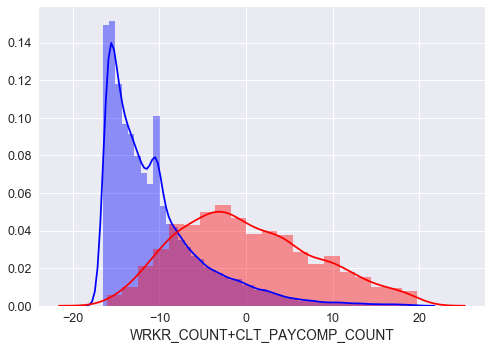

In [147]:
sns.distplot(comparison_df_2[(comparison_df_2['Issue_YN']==0) & (comparison_df_2['WRKR_COUNT+CLT_PAYCOMP_COUNT'] < 20) & (comparison_df_2['WRKR_COUNT+CLT_PAYCOMP_COUNT'] > -20)]['WRKR_COUNT+CLT_PAYCOMP_COUNT'],color='b')
sns.distplot(comparison_df_2[(comparison_df_2['Issue_YN']==1) & (comparison_df_2['WRKR_COUNT+CLT_PAYCOMP_COUNT'] < 20) & (comparison_df_2['WRKR_COUNT+CLT_PAYCOMP_COUNT'] > -20)]['WRKR_COUNT+CLT_PAYCOMP_COUNT'],color='r')
